In [2]:
import pandas as pd
import numpy as np
import os
from datetime import date # get python datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/doringber1996/buki-and-dor/main/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data['BloodPressure'].max()

122

In [21]:
new1 = data[data['Pregnancies'] != 0 ]
new = data[data['Pregnancies'] == 0 ]#.BloodPressure.max()
new['BloodPressure'].max()

110

In [23]:
print(new['SkinThickness'].mean())
print(new1['SkinThickness'].mean())

22.27027027027027
20.243531202435314


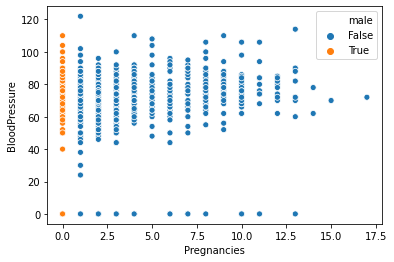

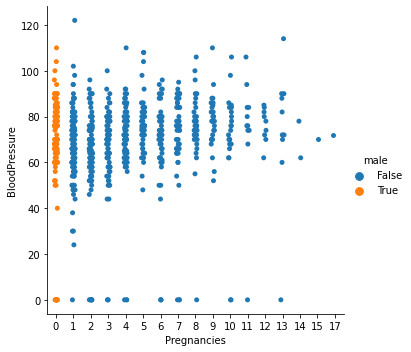

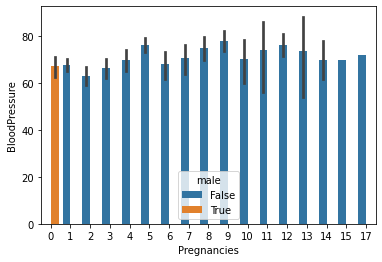

In [54]:
data['male']= data['Pregnancies'] == 0 
data['female'] = data['Pregnancies'] != 0 
data['male_cat'] = data['male'].astype('category').cat.codes
data['female_cat'] = data['female'].astype('category').cat.codes
data['Pregnancies_cat'] = data['Pregnancies'].astype('category').cat.codes
data
fig, axes = plt.subplots(nrows=0, ncols=3) 
sns.scatterplot(data=data, x='Pregnancies', y='BloodPressure',hue = 'male')
sns.catplot(x="Pregnancies", y="BloodPressure", hue="male",  data=data,)
plt.show()
sns.barplot(x="Pregnancies", y="BloodPressure", hue="male",  data=data)
plt.show()


הפיתרון הטוב של דור

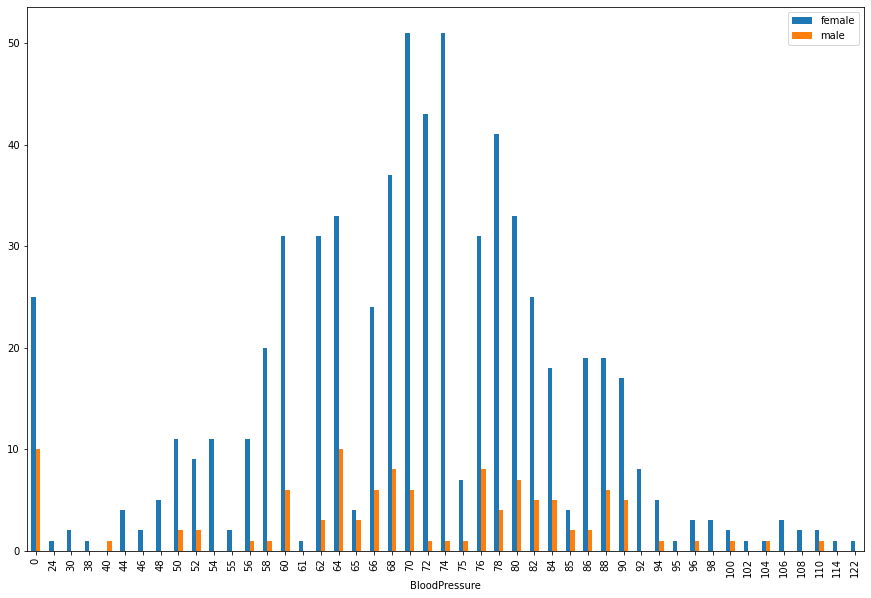

In [102]:
d = data.loc[:,['Pregnancies','BloodPressure']]
d['male']= d['Pregnancies'] ==0
d['female']= d['Pregnancies'] !=0
d = d.loc[:,['female','male','BloodPressure']]
d.groupby('BloodPressure')[['female','male']].sum().plot.bar(figsize=(15,10))

מהי קטגוריית הגיל עבורה ממוצע רמת הגלוקוז בדם )של המטופלים השייכים לקבוצה
זו( הוא הגבוה ביותר?

In [90]:
#pd.pivot_table(data,index=['class'],values=['sepal_length','sepal_width','petal_length','petal_width'])
data.pivot_table(values='Glucose',index='Age').sort_values('Glucose').tail(1)


,Glucose
Age,
59,173.333333


In [88]:
preg8 = data[data['Pregnancies'] == 8]
preg8['Insulin'].mean()


92.8157894736842

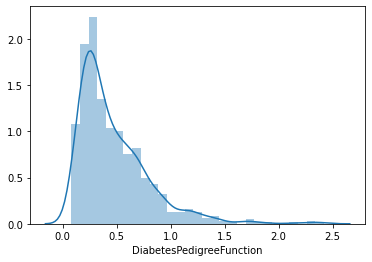

In [92]:
x = pd.Series(data["DiabetesPedigreeFunction"], name="DiabetesPedigreeFunction")
ax = sns.distplot(x)


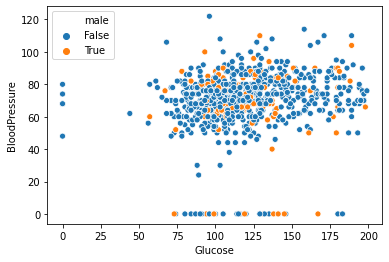

In [93]:
sns.scatterplot(data=data, x='Glucose', y='BloodPressure',hue = 'male')

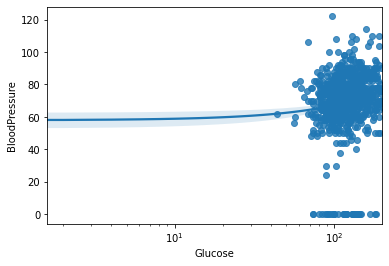

In [99]:
sns.regplot(x='Glucose', y='BloodPressure', data=data).set_xscale('log')